# COVID-19 Data

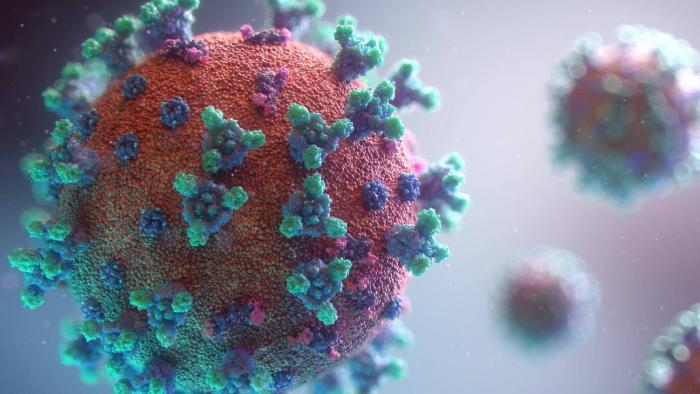

Fonte: **COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University**

https://github.com/CSSEGISandData/COVID-19



**Objetivo**: Explorar funcionalidades do matplotlib e tirar insigths sobre um dataset. 

## Acesso aos dados

Primeiro vamos importar as bibliotecas que vamos utilizar.

- Numpy - Manipular numericamente os dados.
- Matplotlib (PyPlot): Visualização
- Pandas: Acessar e manipular os dados.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Formato ideal para acessar uma base de dados (**dataset**) pequena: arquivos CSV.

In [ ]:
covid_data_casos = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
covid_data_casos

Casos na Zâmbia e na Autrália:




<!-- filtro = blablabla
dataframe[filtro] -->

In [ ]:
covid_data_casos[covid_data_casos['Country/Region'] == 'Zambia']

In [ ]:
covid_data_casos[covid_data_casos['Country/Region'] == 'Australia']

### Retirarando informções que não interessam:

- Province/State, Latitude e Longitude.

In [ ]:
covid_data_casos = covid_data_casos.drop(['Province/State', 'Lat', 'Long'], axis=1)

covid_data_casos

Alguns países tem seus dados divididos por Provincea/Estado.

In [ ]:
covid_data_casos[covid_data_casos['Country/Region'] == 'Australia']

**Podemos agrupar a informação dos estado dentro do mesmo país, utilizado o método `groupby`.**

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

Uma função de agregação tem que ser fornecida: `sum()`, `mean()`, `last()`, `first()`, `min()`, `max()`, definida pelo usuário, ....

---



In [ ]:
covid_data_casos = covid_data_casos.groupby(['Country/Region']).sum()
covid_data_casos

Dados agrupapados, passam a ser indexados pela variável que os agrupou. Nesse caso: `Country/Region`.

Para selecionar os dados de um ou mais países:

- types retornados são diferentes.

In [ ]:
pd.DataFrame(covid_data_casos.loc['France'])

In [ ]:
covid_data_casos.loc[['Australia', 'Brazil']]

## Número de casos por dia

Austrália

In [ ]:
# casos por dia

fig = plt.figure(figsize=(12,8))
ax = plt.axes()


ax.plot(covid_data_casos.loc['Australia']);

ax.set_xticks(ax.get_xticks()[::30]);
ax.tick_params(axis='x', labelrotation=-30);
ax.grid();


### Desafio

**Esses dados estão mostrando os novos casos por dia ou o acumulado de casos até o respectivo dia?**

##### Resposta

Essa é fácil... ;)

## Adicionando outros dados

No mesmo repositório estão disponíveis, no mesmo formato, outros dados, como a série temporal de mortes reportadas e de casos recuperados.

https://github.com/CSSEGISandData/COVID-19

In [ ]:
# dataset de mortes
covid_data_mortes = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
covid_data_mortes[covid_data_mortes['Country/Region'] == 'Australia']

**Arrumando a casa...**

In [ ]:
# dataset de mortes
covid_data_mortes = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
covid_data_mortes = covid_data_mortes.drop(['Province/State', 'Lat', 'Long'], axis=1)
covid_data_mortes = covid_data_mortes.groupby(['Country/Region']).sum()
covid_data_mortes

In [ ]:
# dataset de recuperados
covid_data_recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
covid_data_recuperados = covid_data_recuperados.drop(['Province/State', 'Lat', 'Long'], axis=1)
covid_data_recuperados = covid_data_recuperados.groupby(['Country/Region']).sum()
covid_data_recuperados

### Desafio

Escolha um país e faça um gráfico, com grid, do número de casos, mortos e recuperados ao longo do tempo.

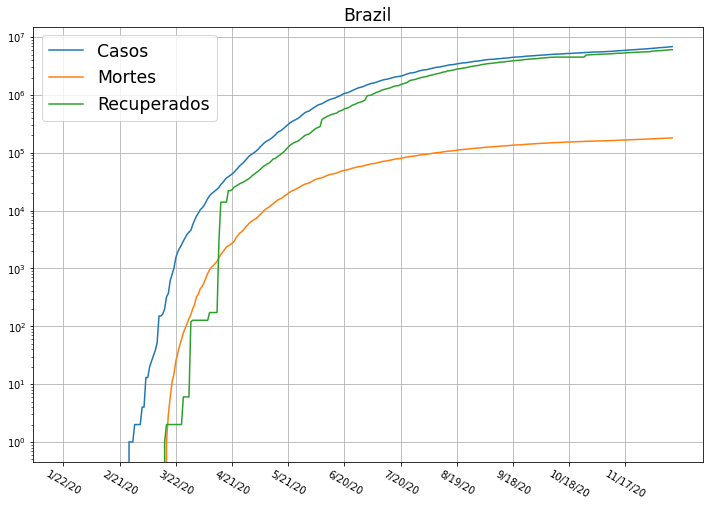



In [ ]:
# coloque sua resposta aqui

#### Resposta:

```python
pais = 'Brazil'

fig = plt.figure(figsize=(12,8))
ax = plt.axes()


ax.plot(covid_data_casos.loc[pais], label='Casos')
ax.plot(covid_data_mortes.loc[pais], label='Mortes')
ax.plot(covid_data_recuperados.loc[pais], label='Recuperados')

# ax.tick_params(axis='x', labelrotation=-30)
# ax.grid()
# ax.legend(fontsize='xx-large')
# ax.set_title(pais, fontsize='xx-large')
# plt.yscale('log')
# ax.set_xticks(ax.get_xticks()[::30]);
```

### Desafio

Para um mesmo país, o número de casos é igual ao número de mortes + recuperados?

In [ ]:
# coloque sua resposta aqui

#### Resposta:

```python
pais = 'Australia'

fig = plt.figure(figsize=(12,8))
ax = plt.axes()


ax.plot(covid_data_casos.loc[pais], label='Casos')
ax.plot(covid_data_mortes.loc[pais], label='Mortes')
ax.plot(covid_data_recuperados.loc[pais], label='Recuperados')
ax.plot(covid_data_recuperados.loc[pais]+covid_data_mortes.loc[pais], label='Mortes + Recuperados')


ax.tick_params(axis='x', labelrotation=-30)
ax.grid()
ax.legend(fontsize='xx-large')
ax.set_title(pais, fontsize='xx-large')
ax.set_xticks(ax.get_xticks()[::30]);
```

### Desafio

Faça um gráfico do número de casos para 4 países diferentes: um na America, um na Europa, um na África e um na Ásia.

É possível encontrar correlações entre formato dos gráficos e aquilo que sabemos sobre a COVD-19?

In [ ]:
# coloque sua resposta aqui

#### Resposta

```python
pais_america = 'Canada'
pais_europa = 'France'
pais_africa = 'Morocco'
pais_asia = 'Japan'

fig = plt.figure(figsize=(12,8))
ax = plt.axes()


ax.plot(covid_data_casos.loc[pais_america], label=pais_america)
ax.plot(covid_data_casos.loc[pais_europa], label=pais_europa)
ax.plot(covid_data_casos.loc[pais_africa], label=pais_africa)
ax.plot(covid_data_casos.loc[pais_asia], label=pais_asia)

ax.tick_params(axis='x', labelrotation=-30)
ax.grid()
ax.legend(fontsize='xx-large')
# plt.yscale('log')
ax.set_xticks(ax.get_xticks()[::30]);
```

### Novos casos por semana

Como estimar o número de novos casos por 

In [ ]:
# novos casos por semana

pais = 'Australia'

covid_data_casos_no_index = covid_data_casos.loc[pais]


In [ ]:
covid_data_casos_no_index = covid_data_casos.loc[pais].reset_index(drop=True)

covid_data_casos_por_semana = covid_data_casos_no_index.groupby(covid_data_casos_no_index.index // 7).apply(lambda x : x.iloc[-1] - x.iloc[0])

covid_data_total_de_casos_por_semana = covid_data_casos_no_index.groupby(covid_data_casos_no_index.index // 7).last()

In [ ]:


fig = plt.figure(figsize=(12,8))
ax = plt.axes()


plt.plot(covid_data_total_de_casos_por_semana, covid_data_casos_por_semana, label=pais)

ax.tick_params(axis='x', labelrotation=-30)
ax.grid()
ax.legend(fontsize='xx-large')

plt.xscale('log')
plt.yscale('log')

ax.set_xlabel('Total de casos por semana')
ax.set_ylabel('Novos casos por semana');

### Desafio

Com o **matplotlib.pyplot** é possível plotar pontos no formato de barras.

In [ ]:
# grande desafio

fig = plt.figure(figsize=(12,8))
ax = plt.axes()
plt.bar([1,2,3,4,5,6,7,8,9,10], [2,6,3,8,1,7,6,3,5,10])
ax.grid()



Faça um gráfico, para um país a sua escolha, com número de casos diários (barras) e a média de casos na última semana.

Exemplo (para o estado de SP):

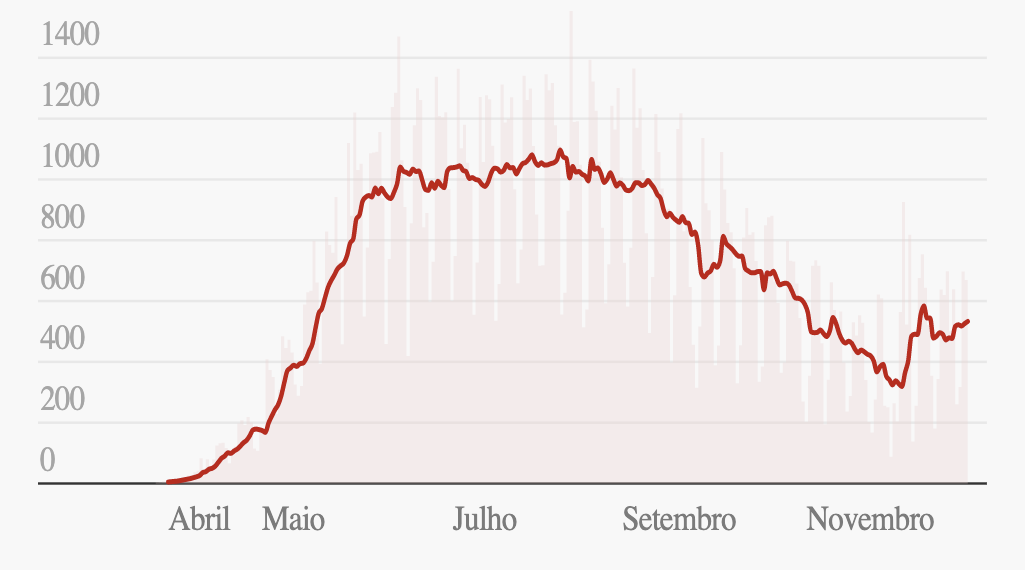

In [ ]:
# coloque sua resposta aqui

#### Resposta

;)